In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=66c3e741ce74565d687caeeeb19bdfe1


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | luganville
Processing Record 2 of Set 13 | new norfolk
Processing Record 3 of Set 13 | saleaula
City not found. Skipping...
Processing Record 4 of Set 13 | muzquiz
City not found. Skipping...
Processing Record 5 of Set 13 | ilulissat
Processing Record 6 of Set 13 | chokurdakh
Processing Record 7 of Set 13 | gat
Processing Record 8 of Set 13 | atuona
Processing Record 9 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | vaini
Processing Record 12 of Set 13 | honningsvag
Processing Record 13 of Set 13 | veraval
Processing Record 14 of Set 13 | praia da vitoria
Processing Record 15 of Set 13 | raga
Processing Record 16 of Set 13 | tasiilaq
Processing Record 17 of Set 13 | paradwip
City not found. Skipping...
Processing Record 18 of Set 13 | beloha
Processing Record 19 of Set 13 | nago
Processing Record 20 of Set 13 | ribei

Processing Record 31 of Set 16 | vastervik
City not found. Skipping...
Processing Record 32 of Set 16 | pirgos
Processing Record 33 of Set 16 | bluff
Processing Record 34 of Set 16 | arraial do cabo
Processing Record 35 of Set 16 | portland
Processing Record 36 of Set 16 | asau
Processing Record 37 of Set 16 | magadan
Processing Record 38 of Set 16 | xiutetelco
City not found. Skipping...
Processing Record 39 of Set 16 | tupik
Processing Record 40 of Set 16 | beysehir
Processing Record 41 of Set 16 | lamar
Processing Record 42 of Set 16 | tabialan
City not found. Skipping...
Processing Record 43 of Set 16 | kandrian
Processing Record 44 of Set 16 | vorobyevka
Processing Record 45 of Set 16 | sola
Processing Record 46 of Set 16 | gora kalwaria
Processing Record 47 of Set 16 | mizpe ramon
City not found. Skipping...
Processing Record 48 of Set 16 | tighina
Processing Record 49 of Set 16 | takoradi
Processing Record 50 of Set 16 | masuda
Processing Record 1 of Set 17 | beringovskiy
Proces

Processing Record 16 of Set 20 | moose factory
Processing Record 17 of Set 20 | sao filipe
Processing Record 18 of Set 20 | hilton head island
Processing Record 19 of Set 20 | souillac
Processing Record 20 of Set 20 | tonantins
Processing Record 21 of Set 20 | san pedro
Processing Record 22 of Set 20 | aklavik
Processing Record 23 of Set 20 | pietarsaari
Processing Record 24 of Set 20 | anicuns
Processing Record 25 of Set 20 | vila franca do campo
Processing Record 26 of Set 20 | kenora
Processing Record 27 of Set 20 | ormara
Processing Record 28 of Set 20 | tual
Processing Record 29 of Set 20 | gamba
Processing Record 30 of Set 20 | kayerkan
Processing Record 31 of Set 20 | teknaf
Processing Record 32 of Set 20 | kabanjahe
Processing Record 33 of Set 20 | corsicana
Processing Record 34 of Set 20 | brae
Processing Record 35 of Set 20 | mareeba
Processing Record 36 of Set 20 | haines junction
Processing Record 37 of Set 20 | conceicao do araguaia
Processing Record 38 of Set 20 | likasi


Processing Record 50 of Set 23 | mahon
Processing Record 1 of Set 24 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 24 | svetlogorsk
Processing Record 3 of Set 24 | katherine
Processing Record 4 of Set 24 | bairiki
Processing Record 5 of Set 24 | sucua
Processing Record 6 of Set 24 | mubende
Processing Record 7 of Set 24 | yagodnoye
Processing Record 8 of Set 24 | yaan
Processing Record 9 of Set 24 | egvekinot
Processing Record 10 of Set 24 | batemans bay
Processing Record 11 of Set 24 | liku
Processing Record 12 of Set 24 | nongan
Processing Record 13 of Set 24 | nelson bay
Processing Record 14 of Set 24 | zupanja
Processing Record 15 of Set 24 | darnah
Processing Record 16 of Set 24 | limbang
Processing Record 17 of Set 24 | wewak
Processing Record 18 of Set 24 | multan
Processing Record 19 of Set 24 | santa eulalia del rio
City not found. Skipping...
Processing Record 20 of Set 24 | dori
Processing Record 21 of Set 24 | saint-georges
Processing Record 22 of Set 24 | dasoguz


In [19]:
print(len(city_data))

593


In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luganville,-15.53,167.17,78.80,88,75,8.05,VU,2020-06-17 18:52:07
1,New Norfolk,-42.78,147.06,33.01,88,0,2.33,AU,2020-06-17 18:49:30
2,Ilulissat,69.22,-51.10,41.00,75,40,6.93,GL,2020-06-17 18:52:07
3,Chokurdakh,70.63,147.92,65.07,48,48,9.91,RU,2020-06-17 18:49:30
4,Gat,31.61,34.76,80.01,45,0,4.14,IL,2020-06-17 18:52:08
5,Atuona,-9.80,-139.03,80.47,71,0,15.61,PF,2020-06-17 18:48:28
6,Rikitea,-23.12,-134.97,75.61,77,27,18.68,PF,2020-06-17 18:52:08
7,Vaini,-21.20,-175.20,69.80,83,75,8.05,TO,2020-06-17 18:52:09
8,Honningsvag,70.98,25.97,44.60,81,1,8.05,NO,2020-06-17 18:52:09
9,Veraval,20.90,70.37,84.49,82,44,11.27,IN,2020-06-17 18:52:09


In [21]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/17/20'

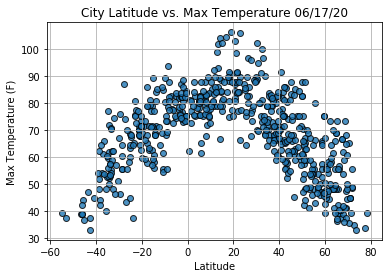

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

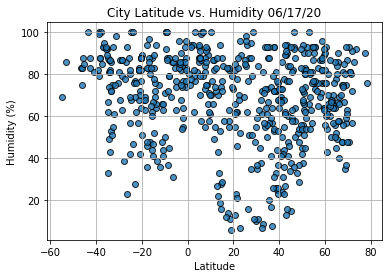

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig2.png")
# Show plot.
plt.show()

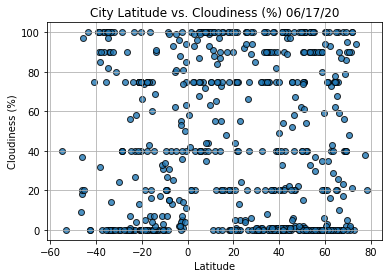

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig3.png")
# Show plot.
plt.show()

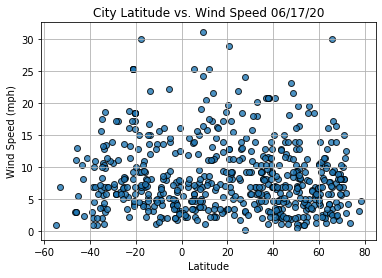

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig4.png")
# Show plot.
plt.show()